<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Group 3: Melvin Yong, Tan Hao Yang, Teo Jun Hao, Isaac Leong, Caleb Ang</b></p>
<p style="text-align: center;"><b>Part 1 of Project</b></p>

For us to finalise what codes are to be placed into this doc. Report writing done here as well

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding dataset

In [4]:
original_df = pd.read_csv("lung cancer survey.csv")

In [132]:
# ydata profiling on original dataset
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(original_df, title="Lung Cancer Dataset Profiling Report", explorative=True)

# Export report as HTML
# profile.to_file("lung_cancer_profile_report.html")

profile.to_notebook_iframe()


ModuleNotFoundError: No module named 'ydata_profiling'

In [5]:
# Data Cleaning
df_No_NA = original_df.dropna()  # Remove empty entries
final_df = df_No_NA[df_No_NA['AGE'] > 21]   # Remove outlier, 21 y/o

final_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [136]:
# Summary statistics of cleaned dataset
print(final_df.describe())

            GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  9000.000000  9000.000000  9000.000000     9000.000000  9000.000000   
mean      0.536333    60.711000     0.521000        0.528000     0.456333   
std       0.498706    11.335146     0.499587        0.499243     0.498117   
min       0.000000    44.000000     0.000000        0.000000     0.000000   
25%       0.000000    48.000000     0.000000        0.000000     0.000000   
50%       1.000000    61.000000     1.000000        1.000000     0.000000   
75%       1.000000    71.000000     1.000000        1.000000     1.000000   
max       1.000000    81.000000     1.000000        1.000000     1.000000   

       PEER_PRESSURE  CHRONIC DISEASE     FATIGUE      ALLERGY      WHEEZING  \
count    9000.000000      9000.000000  9000.000000  9000.000000  9000.000000   
mean        0.510667         0.465667     0.687667     0.548222     0.490444   
std         0.499914         0.498848     0.463471     0.497697   

<Figure size 1000x600 with 0 Axes>

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.530e+03, 9.740e+02,
        1.380e+03, 1.373e+03, 1.116e+03, 1.625e+03]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of Patient Ages')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

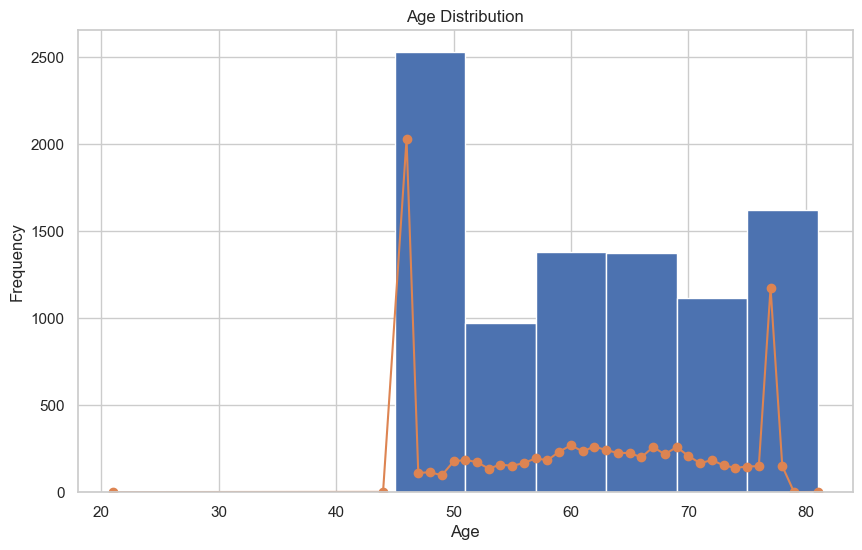

In [138]:
# Data visualisation
# Plot Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_No_NA['AGE'])
plt.title('Histogram of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Count the frequency of each age
age_counts = df_No_NA['AGE'].value_counts().sort_index()

# Plot a line graph of the age counts
plt.plot(age_counts.index, age_counts.values, marker='o')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [139]:
# Correlation Matrix 
# High level overview to understand which variables should be looked into
final_df_corr = final_df.corr()
final_df_corr.style.background_gradient(cmap='coolwarm')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.005543,-0.011091,-0.031982,-0.039688,-0.074431,-0.004365,-0.049215,0.053157,0.036826,0.040493,0.027357,0.017837,-0.009260,0.043874,-0.141006
AGE,-0.005543,1.000000,0.008597,0.004523,0.032944,0.007555,-0.008329,0.053613,-0.019463,0.001679,-0.004965,0.003587,0.018522,-0.006974,0.020547,0.052523
SMOKING,-0.011091,0.008597,1.000000,0.001875,0.013509,-0.026481,-0.029657,0.001695,0.024306,-0.032343,-0.019939,-0.007131,-0.003838,-0.004096,0.010044,0.063074
YELLOW_FINGERS,-0.031982,0.004523,0.001875,1.000000,0.062337,0.055349,0.008992,-0.001341,-0.028243,-0.043450,-0.075707,0.014883,0.016048,0.065091,-0.018293,0.217762
ANXIETY,-0.039688,0.032944,0.013509,0.062337,1.000000,0.040471,-0.032866,-0.017928,-0.047311,-0.039382,-0.001826,-0.058642,-0.005192,0.078098,-0.053414,0.035395
PEER_PRESSURE,-0.074431,0.007555,-0.026481,0.055349,0.040471,1.000000,0.009267,-0.004084,-0.055663,-0.054281,-0.057384,-0.051376,-0.047932,0.106201,-0.021050,0.057908
CHRONIC DISEASE,-0.004365,-0.008329,-0.029657,0.008992,-0.032866,0.009267,1.000000,-0.010099,0.024349,-0.010450,-0.028640,-0.074833,-0.007917,0.050285,-0.023264,-0.021226
FATIGUE,-0.049215,0.053613,0.001695,-0.001341,-0.017928,-0.004084,-0.010099,1.000000,-0.025989,-0.027989,-0.019973,-0.001747,0.046516,-0.022535,-0.015378,0.085235
ALLERGY,0.053157,-0.019463,0.024306,-0.028243,-0.047311,-0.055663,0.024349,-0.025989,1.000000,0.049639,0.065076,0.025346,-0.007747,-0.027669,0.013393,0.106577
WHEEZING,0.036826,0.001679,-0.032343,-0.043450,-0.039382,-0.054281,-0.010450,-0.027989,0.049639,1.000000,0.126259,0.049138,0.010180,0.027963,0.009885,-0.080372


<Figure size 1100x800 with 0 Axes>

<Axes: >

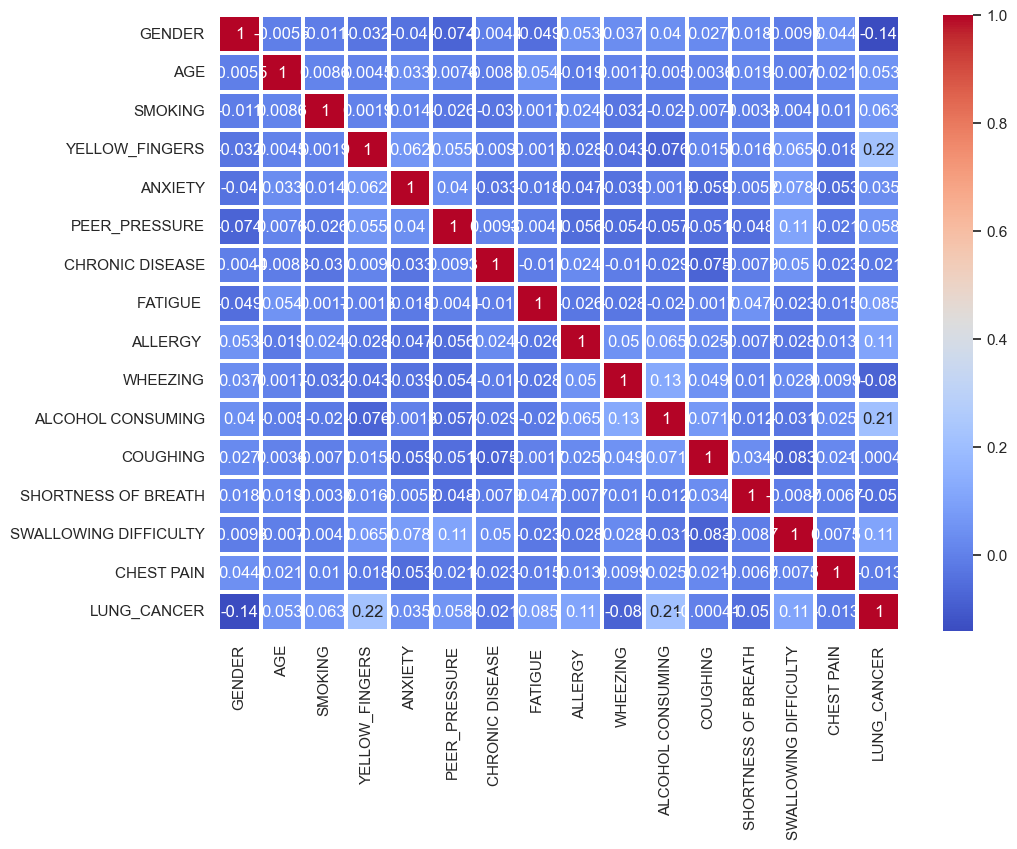

In [142]:
# For presentation's sake
final_df_corr_plot = final_df.corr()

# Draw heatmap
plt.figure(figsize=(11, 8)) 
sns.heatmap(final_df_corr_plot, annot = True, cmap='coolwarm', linewidths=1.5)

plt.show()

In [143]:
# Clustering method # DO NOT RUN
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1] # AGE

# Calculate cost for different cluster numbers
costs = []
for num_clusters in range(1, 10): # From 1 to 9
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=2)
    kproto.fit_predict(final_df, categorical= cat_cols)
    costs.append(kproto.cost_)

# Plot the elbow curve, selection of optimal number of cluster via graphical approach
plt.plot(range(1, 10), costs, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show();

ModuleNotFoundError: No module named 'kmodes'

In [145]:
# Fit K-Prototypes model
# Create the final_df with cluster
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1]
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(final_df, categorical=cat_cols)

final_df = final_df.copy()
# Assign cluster labels to the DataFrame
final_df['cluster'] = clusters

# See how clusters are grouped
age_cluster_summary = final_df.groupby('cluster')['AGE'].agg(['min', 'max'])
print(age_cluster_summary) # We see here, we have grouped cluster = 0 as age 61 to 81, and cluster = 1 as age 44 to 60.

# Invert cluster such that 1: Senior, 0: Middle-aged
final_df['cluster'] = 1 - final_df['cluster']

final_df['cluster'].value_counts() # Each clusters are approximately similarly in number of observation.

ModuleNotFoundError: No module named 'kmodes'

# Smoking

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Smoking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.37893760148457434, 0, '77.89%')

Text(0.42896139901898056, 1, '82.90%')

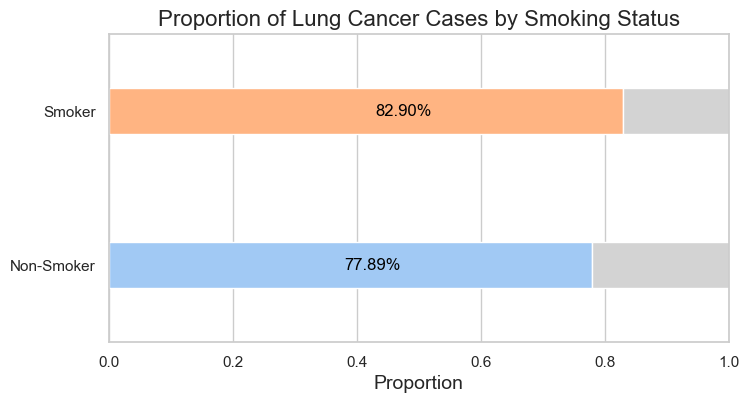

In [148]:
contingency_smoking = pd.crosstab(final_df['SMOKING'], final_df['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])


proportions_smoking = contingency_smoking['Proportion_Cancer']
non_cancer_smoking = 1 - proportions_smoking


plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
y_labels_smoking = ['Non-Smoker', 'Smoker']
bar_width = 0.3 #change the width for a better fit figure
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by Smoking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#to annotate the % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

# Yellow Fingers

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Presence Of Yellow Fingers')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.31374764595103577, 0, '71.37%')

Text(0.48657407407407405, 1, '88.66%')

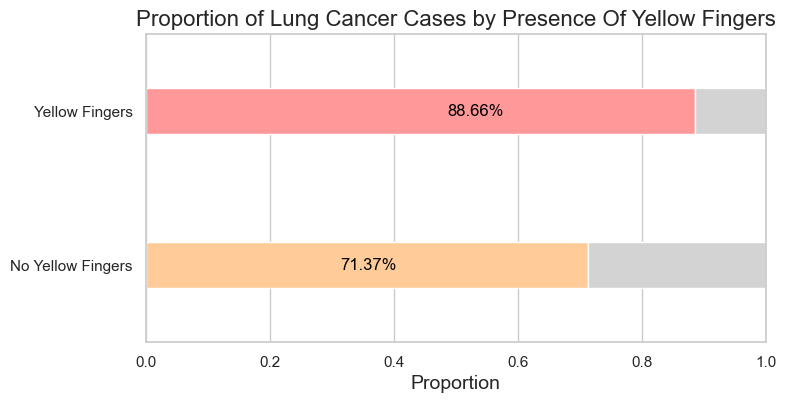

In [151]:
contingency_yellowfingers = pd.crosstab(final_df['YELLOW_FINGERS'], final_df['LUNG_CANCER'])
contingency_yellowfingers['Proportion_Cancer'] = contingency_yellowfingers[1] / (contingency_yellowfingers[0] + contingency_yellowfingers[1])

proportions_yellowfingers = contingency_yellowfingers['Proportion_Cancer']
non_cancer_yellowfingers = 1 - proportions_yellowfingers

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_yellowfingers = ['No Yellow Fingers', 'Yellow Fingers']
bar_width = 0.3 
#create horizontal bar chart for cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_lung_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, proportions_yellowfingers, color=['#FFCC99','#FF9999'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_no_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, non_cancer_yellowfingers, color='lightgrey', left=proportions_yellowfingers, height=bar_width, label='No Lung Cancer')

plt.title('Proportion of Lung Cancer Cases by Presence Of Yellow Fingers', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for yellow finger and non-yellow finger group
for index, value in enumerate(proportions_yellowfingers):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

In [153]:
df_to_work_on = final_df[final_df['LUNG_CANCER']==1]
proportion_smoker_yellow_finger = contingency_smokingyellowfingers['Proportion_Yellow_Fingers'][1.0]
proportions = [proportion_smoker_yellow_finger, 1-proportion_smoker_yellow_finger] 

plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=labels, autopct='%1.2f%%', startangle=90, colors=['yellow', 'cyan'], wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Yellow Fingers (Lung Cancer Patients Who Smoke)', fontsize=14)

plt.show()

NameError: name 'contingency_smokingyellowfingers' is not defined

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x16d6d40b0>,
 [Text(-1.0513753154658687, -0.32343460858270096, 'Has Yellow Fingers'),
  Text(1.0513752851837306, 0.3234347070195606, 'No Yellow Fingers')],
 [Text(-0.5734774447995648, -0.17641887740874596, '59.50%'),
  Text(0.5734774282820349, 0.1764189311015785, '40.50%')])

Text(0.5, 1.0, 'Proportion of Yellow Fingers (Lung Cancer Patients Who Do not Smoke)')

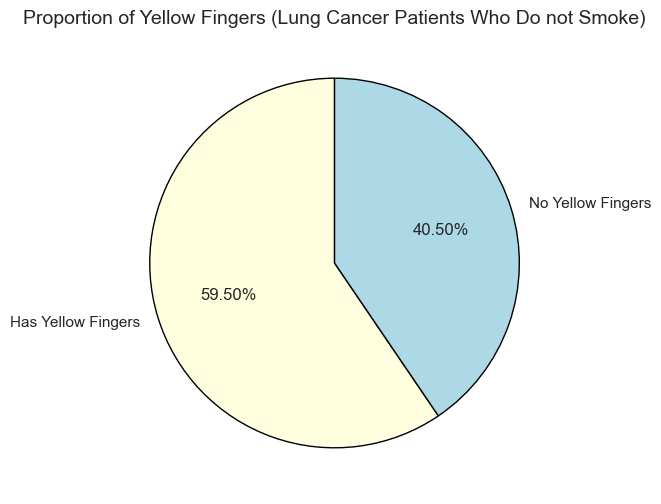

In [155]:

contingency_smokingyellowfingers = pd.crosstab(df_to_work_on['SMOKING'], df_to_work_on['YELLOW_FINGERS'])
contingency_smokingyellowfingers['Proportion_Yellow_Fingers'] = contingency_smokingyellowfingers[1] / (contingency_smokingyellowfingers[0] + 
                                                                                                       contingency_smokingyellowfingers[1])
labels = ['Has Yellow Fingers', 'No Yellow Fingers']
proportion_nonsmoker_yellow_finger = contingency_smokingyellowfingers['Proportion_Yellow_Fingers'][0.0]
proportions = [proportion_nonsmoker_yellow_finger, 1-proportion_nonsmoker_yellow_finger] 

plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=labels, autopct='%1.2f%%', startangle=90, colors=['lightyellow', 'lightblue'], wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Yellow Fingers (Lung Cancer Patients Who Do not Smoke)', fontsize=14)

plt.show()

# Alcohol Consumption

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Drinking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.31374764595103577, 0, '71.37%')

Text(0.48657407407407405, 1, '88.66%')

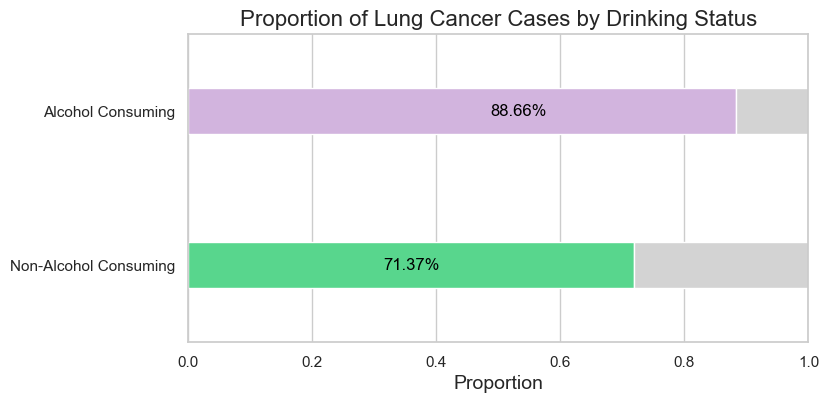

In [158]:
contingency_alcohol = pd.crosstab(final_df['ALCOHOL CONSUMING'], final_df['LUNG_CANCER'])
contingency_alcohol['Proportion_Cancer'] = contingency_alcohol[1] / (contingency_alcohol[0] + contingency_alcohol[1])

proportions_alcohol = contingency_alcohol['Proportion_Cancer']
non_cancer_alcohol = 1 - proportions_alcohol

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_alcohol = ['Non-Alcohol Consuming', 'Alcohol Consuming']
bar_width = 0.3 
#create horizontal bar chart for cancer patients who drink/do not drink using labels above and sns pastel color palette
bars_lung_cancer_alcohol = plt.barh(y_labels_alcohol, proportions_alcohol, color=['#58d68d', '#d2b4de'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patient who drink/do not drink using labels above and sns pastel color palette
bars_no_cancer_alcohol = plt.barh(y_labels_alcohol, proportions_alcohol, color='lightgrey', left=proportions_alcohol, height=bar_width, label='No Lung Cancer')

plt.title('Proportion of Lung Cancer Cases by Drinking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for drinkers and non-drinkers group
for index, value in enumerate(proportions_yellowfingers):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

In [ ]:
final_df[['LUNG_CANCER','SMOKING', 'YELLOW_FINGERS', 'ALCOHOL CONSUMING']].corr()

# Analysis on having multiple lifestyle habits

In [ ]:
contingency_table_combinations = pd.crosstab([final_df['SMOKING'], final_df['YELLOW_FINGERS'], final_df['ALCOHOL CONSUMING']], final_df['LUNG_CANCER'])
contingency_table_combinations['Proportion_Cancer'] = contingency_table_combinations[1] / (contingency_table_combinations[0] + contingency_table_combinations[1])

contingency_table_combinations.sort_values(by='Proportion_Cancer', inplace=True) 
labels = ['None','Smoking only','Alcohol only','Yellow Fingers only','Smoking+Yellow fingers','Smoking+Alcohol','Yellow fingers +Alcohol','Smoking+Yellow fingers +Alcohol']

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid") 

bar_width = 0.3
bars = plt.barh(labels, contingency_table_combinations['Proportion_Cancer'], color=sns.color_palette("pastel", 8), height=bar_width)

plt.title('Proportion of Lung Cancer by Lifestyle Factors', fontsize=16) 
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1)

# annotate % of cancer patients for each combination
for index, value in enumerate(contingency_table_combinations['Proportion_Cancer']):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

# Analysis on lifestyle habits by subgroups

In [ ]:
# Showcase K modes clustering graphically
import matplotlib.pyplot as plt
import numpy as np

# Simulating data for 3 clusters
np.random.seed(42)

# Cluster 1: Low cost 
cluster_1_x = np.random.normal(1, 0.2, 20)
cluster_1_y = np.random.normal(1, 0.2, 20)

# Cluster 2: High cost
cluster_2_x = np.random.normal(5, 0.8, 20)
cluster_2_y = np.random.normal(5, 0.8, 20)

# Cluster 3: Low cost
cluster_3_x = np.random.normal(9, 0.2, 20)
cluster_3_y = np.random.normal(1, 0.2, 20)

# Plotting
plt.figure(figsize=(8, 6))

# Plot Cluster 1
plt.scatter(cluster_1_x, cluster_1_y, color='blue', label='Low Cost (Cluster 1)')
plt.annotate('Low Cost', (1, 1), textcoords="offset points", xytext=(10,10), ha='center')

# Plot Cluster 2
plt.scatter(cluster_2_x, cluster_2_y, color='red', label='High Cost (Cluster 2)')
plt.annotate('High Cost', (5, 5), textcoords="offset points", xytext=(10,10), ha='center')

# Plot Cluster 3
plt.scatter(cluster_3_x, cluster_3_y, color='green', label='Low Cost (Cluster 3)')
plt.annotate('Low Cost', (9, 1), textcoords="offset points", xytext=(10,10), ha='center')

# Adding some center points for visual aid (centers of clusters)
plt.scatter([1, 5, 9], [1, 5, 1], color='black', marker='x', s=100, label='Cluster Centers')

# Annotations for distance (Cost)
plt.arrow(5.5, 5.5, -0.5, -0.5, head_width=0.2, color='gray')
plt.annotate('Cost (Distance)', (5.5, 5.5), textcoords="offset points", xytext=(20,-10), ha='center')

# Setting the labels
plt.title('Clustering and Cost Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Separate the dataset and drop cluster
middle = final_df[final_df["cluster"]== 0]
senior = final_df[final_df["cluster"]== 1]
middle = middle.drop("cluster", axis = 1)
senior = senior.drop("cluster", axis = 1)

# Calculate correlations between Lung Cancer and other variables for middle-aged and senior groups
middle_corr = middle.corr()['LUNG_CANCER'].drop('LUNG_CANCER')
senior_corr = senior.corr()['LUNG_CANCER'].drop('LUNG_CANCER')

# Create a DataFrame to store correlations
correlation_df = pd.DataFrame({
    'Middle Age': middle_corr,
    'Senior': senior_corr
})

# Plotting bar chart for each symptom
correlation_df.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.xlabel('Symptoms')
plt.ylabel('Correlation with Lung Cancer')
plt.title('Comparison of Correlation with Lung Cancer: Middle Age vs Senior')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 

# Logistics regression on whole data 
x = final_df.drop(labels =["LUNG_CANCER", "AGE"], axis = 1)
y = final_df["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(f"Whole dataset: {result.summary()}")

# Logistics regression on middle age
x = middle.drop(labels =["LUNG_CANCER", "AGE"], axis = 1)
y = middle["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(f"Middle-age dataset: {result.summary()}")

# Logistics regression on senior
x = senior.drop(labels =["LUNG_CANCER", "AGE"], axis = 1)
y = senior["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(f"Senior dataset: {result.summary()}")


# By Gender

<Axes: >

Text(0.5, 0, 'Symptoms')

Text(0, 0.5, 'Correlation with Lung Cancer')

Text(0.5, 1.0, 'Comparison of Correlation with Lung Cancer: Female vs Male')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'AGE'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN')])

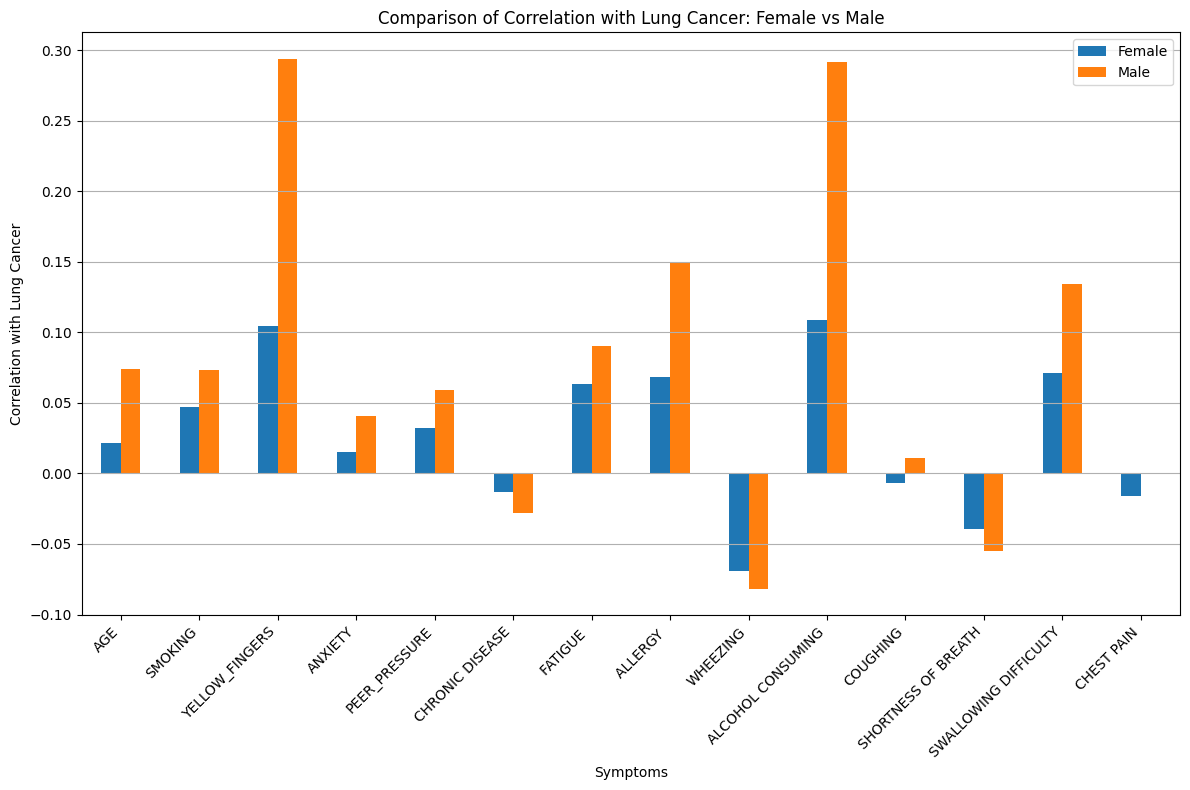

In [7]:
# SUBGROUP-GENDER
# Split gender dataframes
female = final_df[final_df['GENDER']==0]
male = final_df[final_df['GENDER']==1]
female = female.drop("GENDER", axis = 1)
male = male.drop("GENDER", axis = 1)

# Calculate correlations between Lung Cancer and other variables for middle-aged and senior groups
female_corr = female.corr()['LUNG_CANCER'].drop('LUNG_CANCER')
male_corr = male.corr()['LUNG_CANCER'].drop('LUNG_CANCER')

# Create a DataFrame to store correlations
correlation_df = pd.DataFrame({
    'Female': female_corr,
    'Male': male_corr
})

# Plotting bar chart for each symptom
correlation_df.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.xlabel('Symptoms')
plt.ylabel('Correlation with Lung Cancer')
plt.title('Comparison of Correlation with Lung Cancer: Female vs Male')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')

# Show the plot
plt.tight_layout()
plt.show()


Male Proportions

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Male: Proportion of Lung Cancer Cases by Smoking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.32058194266153184, 0, '72.06%')

Text(0.38353413654618473, 1, '78.35%')

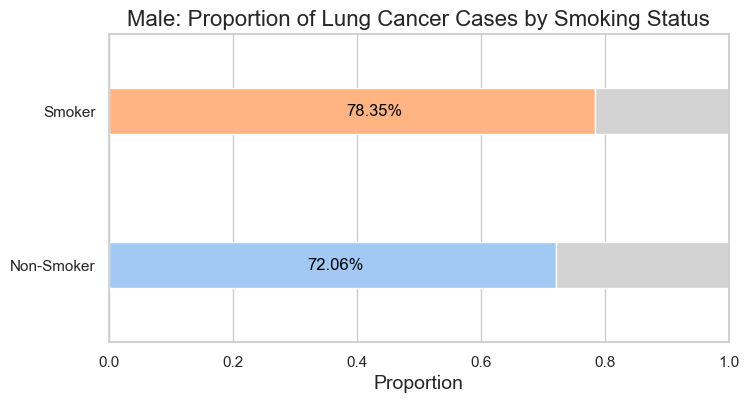

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Male: Proportion of Lung Cancer Cases by Presence Of Yellow Fingers')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.22297872340425529, 0, '62.30%')

Text(0.47646346386758176, 1, '87.65%')

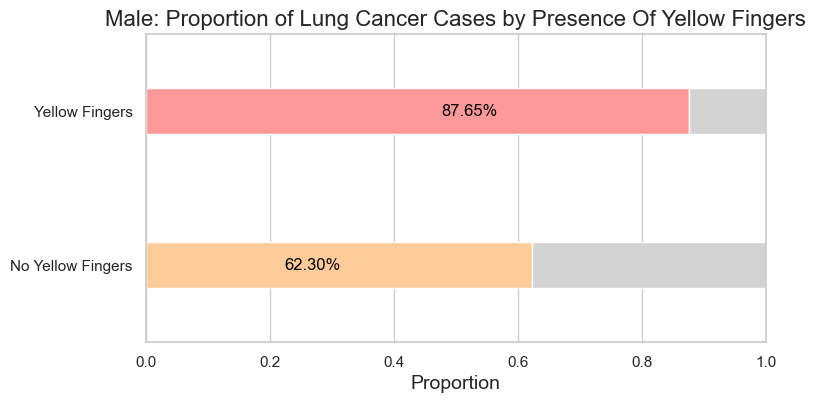

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Male: Proportion of Lung Cancer Cases by Drinking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.21562925942753297, 0, '61.56%')

Text(0.46824067022086824, 1, '86.82%')

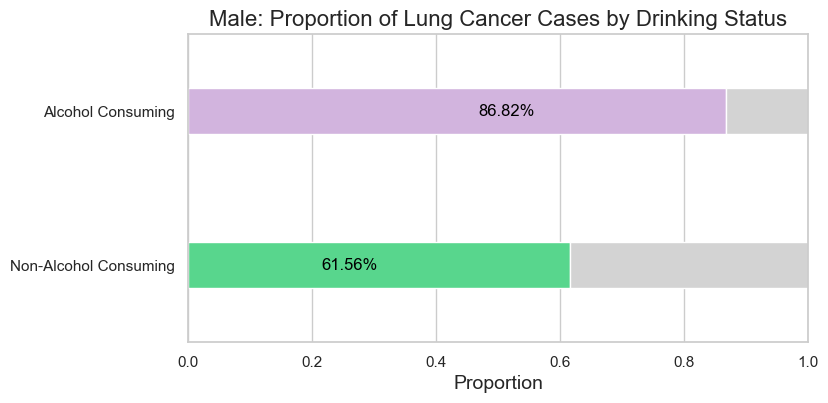

In [8]:
#SMOKING
contingency_smoking_men = pd.crosstab(male['SMOKING'], male['LUNG_CANCER'])
contingency_smoking_men['Proportion_Cancer'] = contingency_smoking_men[1] / (contingency_smoking_men[0] + contingency_smoking_men[1])


proportions_smoking_men = contingency_smoking_men['Proportion_Cancer']
non_cancer_smoking_men = 1 - proportions_smoking_men


plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
y_labels_smoking = ['Non-Smoker', 'Smoker']
bar_width = 0.3 #change the width for a better fit figure
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking_men, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking_men, color='lightgrey', left=proportions_smoking_men, height=bar_width)

plt.title('Male: Proportion of Lung Cancer Cases by Smoking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#to annotate the % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking_men):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

#YELLOW FINGERS
contingency_yellowfingers_men = pd.crosstab(male['YELLOW_FINGERS'], male['LUNG_CANCER'])
contingency_yellowfingers_men['Proportion_Cancer'] = contingency_yellowfingers_men[1] / (contingency_yellowfingers_men[0] + contingency_yellowfingers_men[1])

proportions_yellowfingers_men = contingency_yellowfingers_men['Proportion_Cancer']
non_cancer_yellowfingers_men = 1 - proportions_yellowfingers_men

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_yellowfingers = ['No Yellow Fingers', 'Yellow Fingers']
bar_width = 0.3 
#create horizontal bar chart for cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_lung_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, proportions_yellowfingers_men, color=['#FFCC99','#FF9999'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_no_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, non_cancer_yellowfingers_men, color='lightgrey', left=proportions_yellowfingers_men, height=bar_width, label='No Lung Cancer')

plt.title('Male: Proportion of Lung Cancer Cases by Presence Of Yellow Fingers', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for yellow finger and non-yellow finger group
for index, value in enumerate(proportions_yellowfingers_men):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

#ALCOHOL CONSUMING
contingency_alcohol_men = pd.crosstab(male['ALCOHOL CONSUMING'], male['LUNG_CANCER'])
contingency_alcohol_men['Proportion_Cancer'] = contingency_alcohol_men[1] / (contingency_alcohol_men[0] + contingency_alcohol_men[1])

proportions_alcohol_men = contingency_alcohol_men['Proportion_Cancer']
non_cancer_alcohol_men = 1 - proportions_alcohol_men

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_alcohol = ['Non-Alcohol Consuming', 'Alcohol Consuming']
bar_width = 0.3 
#create horizontal bar chart for cancer patients who drink/do not drink using labels above and sns pastel color palette
bars_lung_cancer_alcohol = plt.barh(y_labels_alcohol, proportions_alcohol_men, color=['#58d68d', '#d2b4de'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patient who drink/do not drink using labels above and sns pastel color palette
bars_no_cancer_alcohol = plt.barh(y_labels_alcohol, non_cancer_alcohol_men, color='lightgrey', left=proportions_alcohol_men, height=bar_width, label='No Lung Cancer')

plt.title('Male: Proportion of Lung Cancer Cases by Drinking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for drinkers and non-drinkers group
for index, value in enumerate(proportions_alcohol_men):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()


Female Proportions

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Female: Proportion of Lung Cancer Cases by Smoking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.4480243161094225, 0, '84.80%')

Text(0.480400181900864, 1, '88.04%')

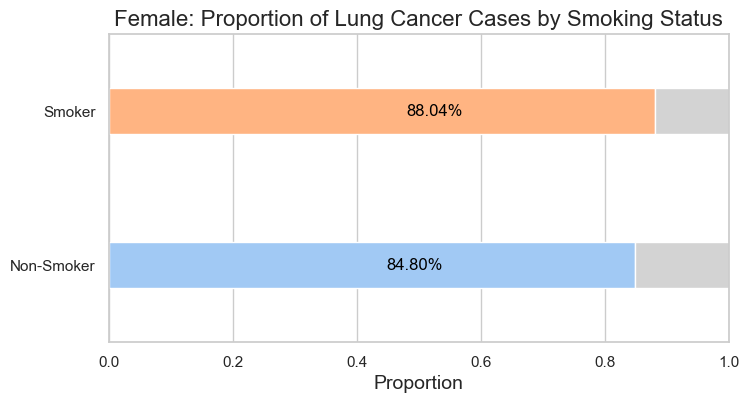

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Female: Proportion of Lung Cancer Cases by Presence Of Yellow Fingers')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.4261327713382508, 0, '82.61%')

Text(0.4975824175824176, 1, '89.76%')

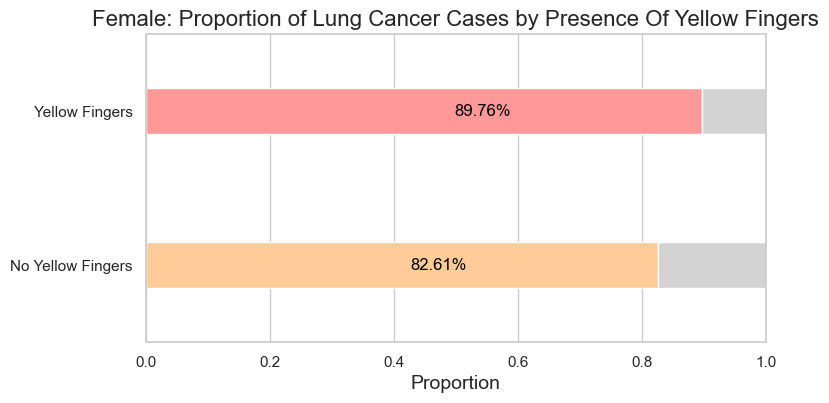

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Female: Proportion of Lung Cancer Cases by Drinking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.4277027027027027, 0, '82.77%')

Text(0.5019514516896716, 1, '90.20%')

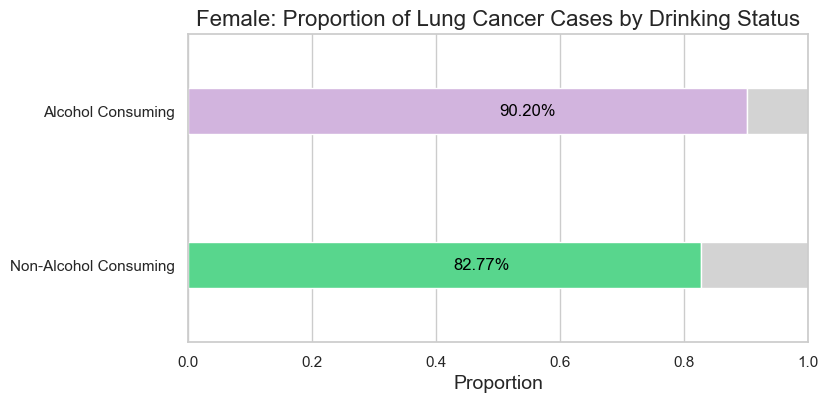

In [8]:
#SMOKING
contingency_smoking_women = pd.crosstab(female['SMOKING'], female['LUNG_CANCER'])
contingency_smoking_women['Proportion_Cancer'] = contingency_smoking_women[1] / (contingency_smoking_women[0] + contingency_smoking_women[1])


proportions_smoking_women = contingency_smoking_women['Proportion_Cancer']
non_cancer_smoking_women = 1 - proportions_smoking_women


plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
y_labels_smoking = ['Non-Smoker', 'Smoker']
bar_width = 0.3 #change the width for a better fit figure
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking_women, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking_women, color='lightgrey', left=proportions_smoking_women, height=bar_width)

plt.title('Female: Proportion of Lung Cancer Cases by Smoking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#to annotate the % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking_women):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

#YELLOW FINGERS
contingency_yellowfingers_women = pd.crosstab(female['YELLOW_FINGERS'], female['LUNG_CANCER'])
contingency_yellowfingers_women['Proportion_Cancer'] = contingency_yellowfingers_women[1] / (contingency_yellowfingers_women[0] + contingency_yellowfingers_women[1])

proportions_yellowfingers_women = contingency_yellowfingers_women['Proportion_Cancer']
non_cancer_yellowfingers_women = 1 - proportions_yellowfingers_women

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_yellowfingers = ['No Yellow Fingers', 'Yellow Fingers']
bar_width = 0.3 
#create horizontal bar chart for cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_lung_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, proportions_yellowfingers_women, color=['#FFCC99','#FF9999'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patients with or without yellow fingers using labels above and sns pastel color palette
bars_no_cancer_yellowfingers = plt.barh(y_labels_yellowfingers, non_cancer_yellowfingers_women, color='lightgrey', left=proportions_yellowfingers_women, height=bar_width, label='No Lung Cancer')

plt.title('Female: Proportion of Lung Cancer Cases by Presence Of Yellow Fingers', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for yellow finger and non-yellow finger group
for index, value in enumerate(proportions_yellowfingers_women):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

#ALCOHOL CONSUMING
contingency_alcohol_women = pd.crosstab(female['ALCOHOL CONSUMING'], female['LUNG_CANCER'])
contingency_alcohol_women['Proportion_Cancer'] = contingency_alcohol_women[1] / (contingency_alcohol_women[0] + contingency_alcohol_women[1])

proportions_alcohol_women = contingency_alcohol_women['Proportion_Cancer']
non_cancer_alcohol_women = 1 - proportions_alcohol_women

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid") 
y_labels_alcohol = ['Non-Alcohol Consuming', 'Alcohol Consuming']
bar_width = 0.3 
#create horizontal bar chart for cancer patients who drink/do not drink using labels above and sns pastel color palette
bars_lung_cancer_alcohol = plt.barh(y_labels_alcohol, proportions_alcohol_women, color=['#58d68d', '#d2b4de'], height=bar_width, label='Lung Cancer')
#create horizontal bar chart for non-cancer patient who drink/do not drink using labels above and sns pastel color palette
bars_no_cancer_alcohol = plt.barh(y_labels_alcohol, non_cancer_alcohol_women, color='lightgrey', left=proportions_alcohol_women, height=bar_width, label='No Lung Cancer')

plt.title('Female: Proportion of Lung Cancer Cases by Drinking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for drinkers and non-drinkers group
for index, value in enumerate(proportions_alcohol_women):
    plt.text(value - 0.4, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()